# Modelling Background Data
This notebook attempts to use some basic functions and fitting algorithms to have an analytical function to describe the LHCb background data.

## Setup & Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Data, Cut, Plots, Consts

In [2]:
SFNAME, SSUFFIX = Consts().get_simulated_tuple()
RFNAME, RSUFFIX = Consts().get_real_tuple()
sd, rd = Data(SFNAME, SSUFFIX), Data(RFNAME, RSUFFIX)
sdc, rdc = Cut(sd), Cut(rd)

## Setup Plotting Functions
Plotting is a pain I just make some simple functions here so that the plots are all consistent and I do not have to repeat code what feels like 500 times.

In [69]:
def simple_hist(invariant_masses, label="Empty label", normalised=True, bins=100, figsize=(11, 9), savefig=None):
    # Create bins evenly spaced bins over the range of invariant_masses provided
    bin_space = np.linspace(int(np.round(np.min(invariant_masses), 0)), int(np.round(np.max(invariant_masses), 1)), bins+1)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    hist_data = ax.hist(invariant_masses, bins=bin_space, density=normalised, edgecolor='k', label=label)
    ax.set_ylabel(f'Frequency, normalised = {normalised}')
    ax.set_xlabel('Invariant mass (MeV)')
    plt.legend(frameon=False)
    plt.title('Histogram of Invariant Mass')
    plt.show()
    if savefig is not None:
        plt.savefig(savefig)
    return hist_data

def hist_with_errors(invariant_masses, label="Empty Label", normalised=True, bins=100, bin_space=None, figsize=(11,9), savefig=None):
    if bin_space is None:
        bin_space = np.linspace(int(np.round(np.min(invariant_masses), 0)), int(np.round(np.max(invariant_masses), 1)), bins+1)
    bin_centr = [(bin_space[i] + bin_space[i+1])/2 for i in range(len(bin_space) - 1)]
    bin_width = (bin_space[1] - bin_space[0])
    hist_frq_no_norm = np.histogram(invariant_masses, bin_space, density=False)
    hist_frq = np.histogram(invariant_masses, bin_space, density=normalised) # Get the normalisation factor from this
    hist_err = np.sqrt(hist_frq_no_norm[0]) # Error on the bin is proportional to the sqrt of the counts
    if normalised: # Adjust error bars to be smaller
        hist_err *= (hist_frq[0]/hist_frq_no_norm[0]) # TODO: Add the normalisation factor in here
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.bar(bin_centr, hist_frq[0], yerr=hist_err, width=bin_width, edgecolor='k', label=label) ###  yerr=hist_err
    ax.set_ylabel(f'Frequency (Normalised={normalised})')
    ax.set_xlabel('Invariant Mass (MeV)')
    plt.title('Histogram of Invariant Mass')
    plt.legend(frameon=False)
    if savefig is not None:
        plt.savefig(savefig)
    plt.show()
    print(hist_err)
    return hist_frq

## Fetch Data & Pre-Analyse

In [66]:
df = rd.fetch_features(['Lb_M'])

/tmp/ipykernel_1752777/442862896.py:24: RuntimeWarning: invalid value encountered in true_divide
  hist_err *= (hist_frq[0]/hist_frq_no_norm[0]) # TODO: Add the normalisation factor in here


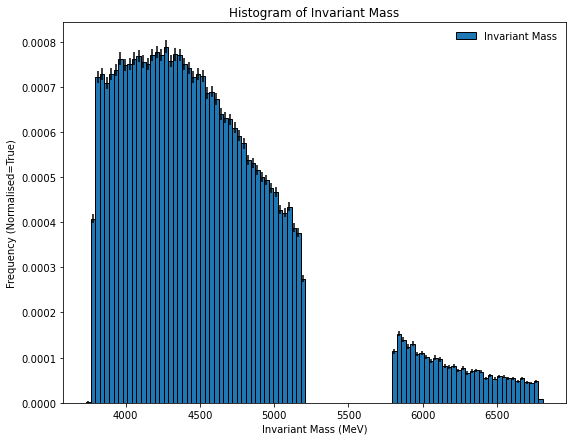

[8.11917055e-07 9.98600968e-06 1.32939092e-05 1.33591144e-05
 1.31625298e-05 1.33591144e-05 1.34396186e-05 1.36607526e-05
 1.35262909e-05 1.35484253e-05 1.36607526e-05 1.37089234e-05
 1.36014007e-05 1.35550585e-05 1.37307633e-05 1.37960757e-05
 1.37285809e-05 1.38956251e-05 1.36102099e-05 1.37438506e-05
 1.37263981e-05 1.35594789e-05 1.34730201e-05 1.33006694e-05
 1.33501395e-05 1.33096776e-05 1.29675865e-05 1.29906729e-05
 1.28398697e-05 1.25112847e-05 1.24344098e-05 1.24006271e-05
 1.22131522e-05 1.20327193e-05 1.18621761e-05 1.14665728e-05
 1.14010565e-05 1.12422597e-05 1.10541139e-05 1.09943174e-05
 1.07907523e-05 1.06959234e-05 1.02320293e-05 1.01526530e-05
 1.03078880e-05 9.74607962e-06 9.60361257e-06 8.19996031e-06
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan         

In [71]:
dat = hist_with_errors(df, label='Invariant Mass', figsize=(9, 7), normalised=True)

Apply a basic masscut to remove the rubbish data at the extremes which for now we arbitraruly define as our region of interest $\pm900$ MeV.

In [49]:
pm = 800
cdf = df[df['Lb_M'].between(5250-pm, 5750+pm)]

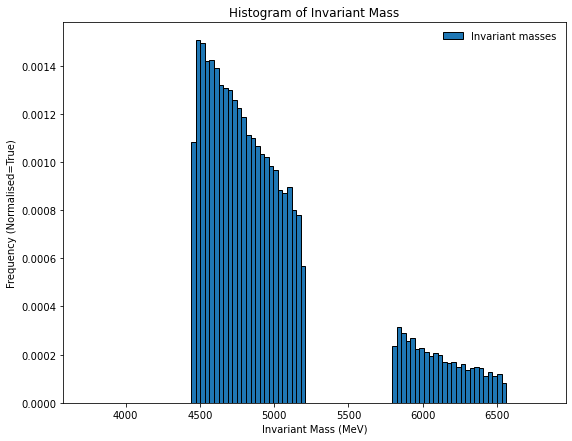

In [51]:
b = hist_with_errors(cdf, label='Invariant masses', bin_space=dat[1], figsize=(9,7))